# Recap

### `CrossEntropy` vs `BinaryCrossEntropy`?

`BinaryCrossEntropy` может прдесказывать для одного объекта одновременно несколько классов. Классы считаются независимыми.


`CrossEntropy` тоже можно применять для сегментации если области разметки не пересекются.

### Чем YOLO отличается от UNet?

Применяются для разных задач:
* YOLO для детекции объектов (найти bounding-box'ы)
* UNet для сегментации - присвоить каждому пикселю класс


### Что такое `transfer learning`, `fine-tuning`?

Способ переиспользовать обученные ядра сверток и другие параметры сети, обученной на другой задаче.



### Почему это делают?

Сети быстрее дообучить, чем обучить с нуля. Иногда с нуля сложныо обучить, потому что датасет маленький. Если датасет большой, то все равно хорошо --- можно считать, что будет больше данных, меньше вероятность переобучиться.



### В чем разница?

В общем-то, `fine-tuning` --- это подмножество `transfer learning`.



### Как заморозить веса сети?

Какие бывают можете предложить стратегии разморозки?

```python
# замораживаем веса для backbone'а сети
for p in resnet.parameters():
    p.requires_grad = False

# размораживаем наш классификатор
for p in resnet.fc.parameters():
    p.requires_grad = True
```


https://cs231n.github.io/transfer-learning/

# CNN Architectures

## ResNet

In [ ]:
from torchvision.models import resnet18
import torch.optim as optim
import torch

resnet = resnet18(pretrained=True) # pretrained=True
resnet

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet.fc = nn.Linear(512, 10)

## EfficientNet

* [Paper](https://arxiv.org/abs/1905.11946)
* [Implementation](https://github.com/lukemelas/EfficientNet-PyTorch)


----

#### [MnasNet](https://ai.googleblog.com/2018/08/mnasnet-towards-automating-design-of.html)

MnasNet запустили для мобилок, получили хорошее кач-во, быстрое вычисление. Строили с помощью NAS + RL. Целевым устройством были мобилки

Specifically, a sub search space for a block i consists of the
following choices:
* Convolutional ops ConvOp: regular conv (conv), depthwise
conv (dconv), and mobile inverted bottleneck conv.
* Convolutional kernel size KernelSize: 3x3, 5x5.
* Squeeze-and-excitation ratio SERatio: 0, 0.25.
* Skip ops SkipOp: pooling, identity residual, or no skip.
* Output filter size Fi.
* Number of layers per block Ni.

* EfficientNet уже повысили лимит


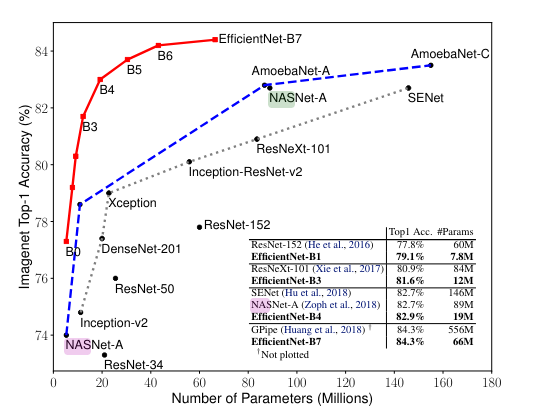


### [Swish function](https://en.wikipedia.org/wiki/Swish_function)

```
 f(x) = x · sigmoid(x)
```




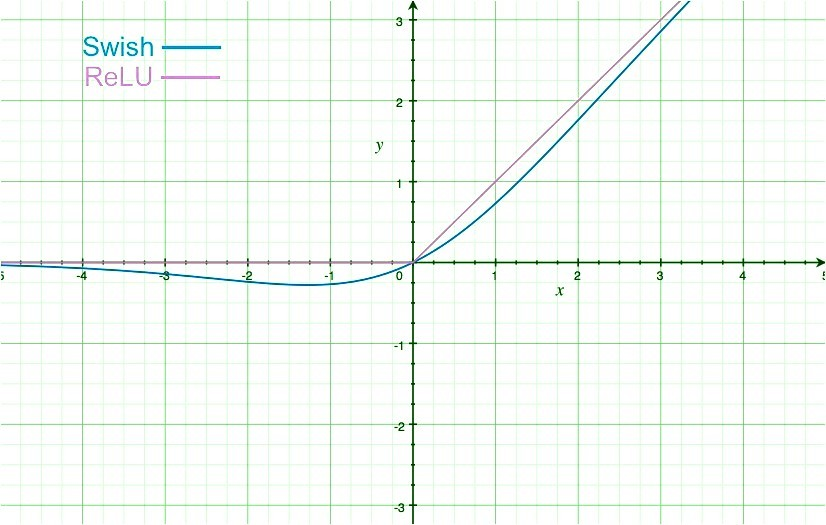

### [Depthwise Convolution](https://paperswithcode.com/method/depthwise-convolution)




Depthwise Convolution is a type of convolution where we apply a single convolutional filter for each input channel. In the regular 2D convolution performed over multiple input channels, the filter is as deep as the input and lets us freely mix channels to generate each element in the output. In contrast, depthwise convolutions keep each channel separate. To summarize the steps, we:

1. Split the input and filter into channels.
1. We convolve each input with the respective filter.
1. We stack the convolved outputs together.



![depthwise_conv](https://production-media.paperswithcode.com/methods/1_yG6z6ESzsRW-9q5F_neOsg_eaJuoa5.png)

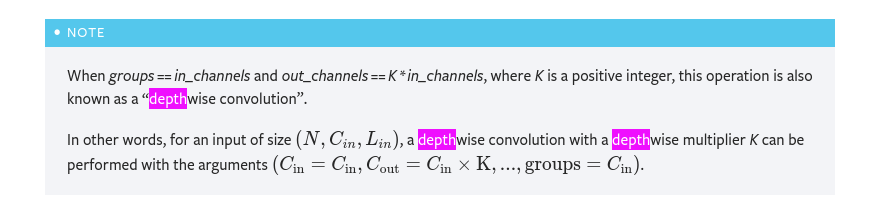

In [ ]:
Conv2d(10, 20, groups=10)
10 x Conv2d(1, 2)


Conv2d(30, 20, groups=10)
10 x Conv2d(3, 2)


Conv2d(10, 10, groups=10)
10 x Conv2d(1, 1)


In [ ]:
list(map(lambda x: x.shape, list(nn.Conv2d(4, 2, kernel_size=3, groups=2).parameters())))

[torch.Size([2, 2, 3, 3]), torch.Size([2])]

In [ ]:
list(map(lambda x: x.shape, list(nn.Conv2d(10, 20, kernel_size=3, groups=10).parameters())))

In [ ]:
sum([ p.numel() for p in nn.Conv2d(10, 10, kernel_size=3, groups=10).parameters()]) # depthwise

100

In [ ]:
sum([ p.numel() for p in nn.Conv2d(10, 10, kernel_size=3, groups=1).parameters()])

910

In [ ]:
list(map(lambda x: x.shape, list(nn.Conv2d(10, 10, kernel_size=3, groups=1).parameters())))

[torch.Size([10, 10, 3, 3]), torch.Size([10])]

In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=9d6dde3b4a5ec8cc74db1222137bf1a8bce98edb5eefb33c4c039e7cc5c3f454
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [ ]:
from efficientnet_pytorch import EfficientNet
efficientnet = EfficientNet.from_pretrained('efficientnet-b0')
efficientnet

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [ ]:
[ 1, 1280, 48, 48 ]
[ 1, 1280 ]


Linear() ~ [ 1280, 1000 ]

horse ~ [ 1280 ] * [ 1, 1280, 48, 48 ]

[ 1, 1280, 48, 48 ] -~ [ 1, 1280, 256, 256 ]



## Unet (Pixel Segmentation)

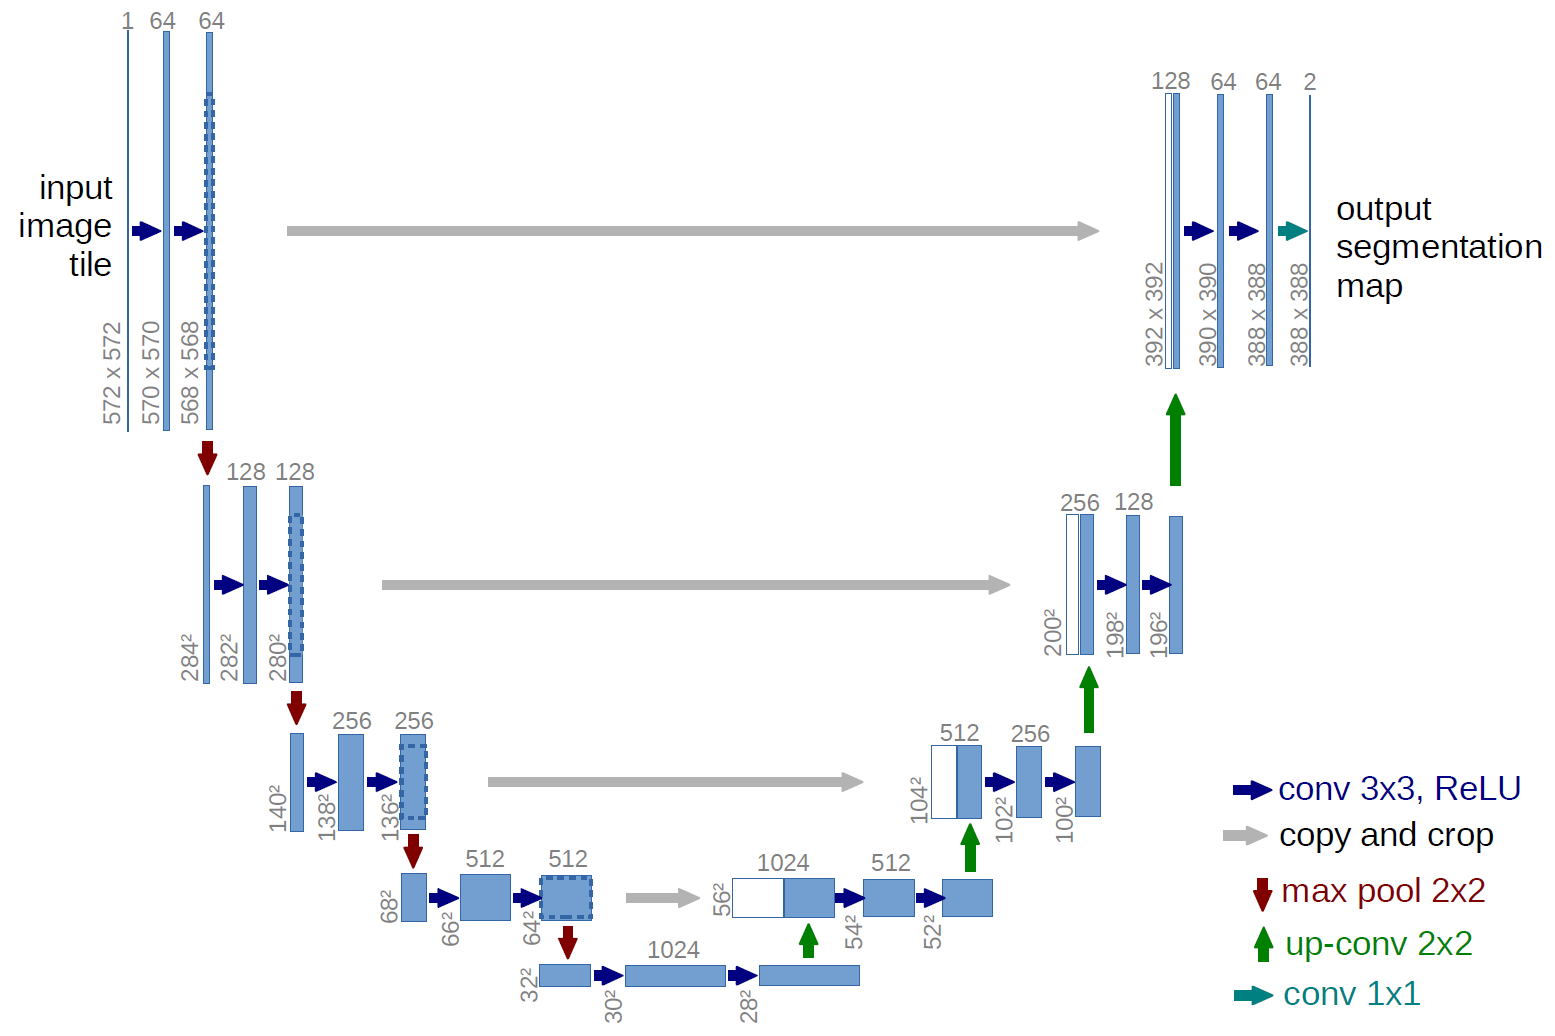

In [ ]:
# https://github.com/milesial/Pytorch-UNet/

""" Parts of the U-Net model """

import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes


        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)

        self.down4 = Down(512, 1024)
        self.up1 = Up(1024, 512)
        self.up2 = Up(512, 256)
        self.up3 = Up(256, 128)
        self.up4 = Up(128, 64)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits


## Как посмотреть на другие архитектуры?

* [**torchvision.models**](https://pytorch.org/vision/stable/models.html)
* погуглить уже существующее решение
* сделать самостоятельно


# Class Activation Map

Интерпретация предсказаний сверточных нейросеток

http://cnnlocalization.csail.mit.edu/



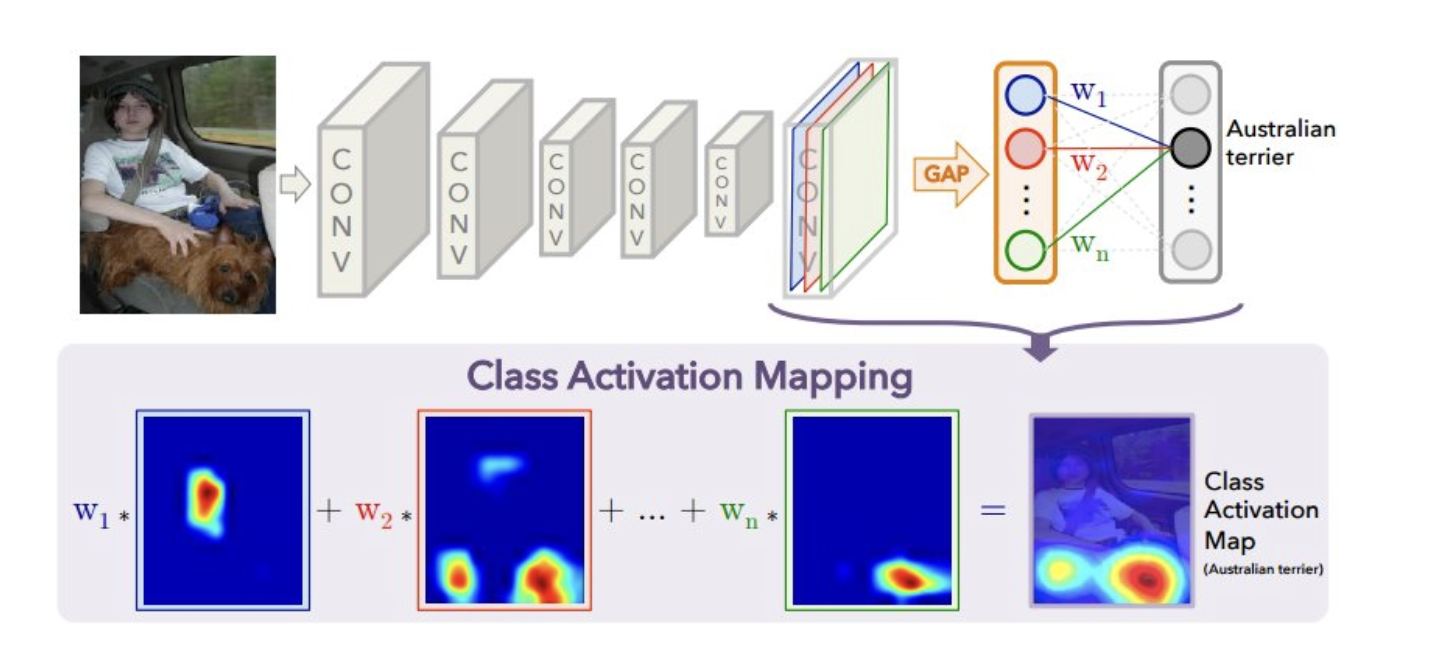

In [ ]:
!wget https://raw.githubusercontent.com/m12sl/dl-hse-2021/main/05-computer-vision-1/imagenet_1k.json

--2024-02-26 07:12:19--  https://raw.githubusercontent.com/m12sl/dl-hse-2021/main/05-computer-vision-1/imagenet_1k.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31565 (31K) [text/plain]
Saving to: ‘imagenet_1k.json’

imagenet_1k.json    100%[===================>]  30.83K  --.-KB/s    in 0s      

2024-02-26 07:12:19 (99.3 MB/s) - ‘imagenet_1k.json’ saved [31565/31565]



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import json

from tqdm.auto import tqdm

with open("imagenet_1k.json") as fin:
    clsidx = json.load(fin)


In [ ]:
net = torchvision.models.resnet50(pretrained=True)
net.layer4, net.avgpool, net.fc # 3 last layers

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 144MB/s]


(Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (downsample): Sequential(
       (0): Conv2d(1024, 2048, kernel_size=(1, 1), stride=(2, 2), bias=False)
       (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (1): Bottleneck(
     (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [ ]:
!wget https://horseyhooves.com/wp-content/uploads/2021/09/Brown-horse-and-Yorkshire-Terrier-dog.jpg.webp

--2024-02-26 07:12:27--  https://horseyhooves.com/wp-content/uploads/2021/09/Brown-horse-and-Yorkshire-Terrier-dog.jpg.webp
Resolving horseyhooves.com (horseyhooves.com)... 172.66.43.53, 172.66.40.203, 2606:4700:3108::ac42:28cb, ...
Connecting to horseyhooves.com (horseyhooves.com)|172.66.43.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42630 (42K) [image/webp]
Saving to: ‘Brown-horse-and-Yorkshire-Terrier-dog.jpg.webp’

Brown-horse-and-Yor 100%[===================>]  41.63K  --.-KB/s    in 0s      

2024-02-26 07:12:28 (167 MB/s) - ‘Brown-horse-and-Yorkshire-Terrier-dog.jpg.webp’ saved [42630/42630]



In [ ]:
IMAGE_PATH = "./Brown-horse-and-Yorkshire-Terrier-dog.jpg.webp"

def load(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (300, 210))
    img = img.astype(np.float32) / 255.0 # img \in [0, 1]
    mean = np.array([0.485, 0.456, 0.406]).reshape(1, 1, 3)
    std =  np.array([0.229, 0.224, 0.225]).reshape(1, 1, 3)
    img = (img - mean) / std
    img = img.astype(np.float32)
    img = np.transpose(img, [2, 0, 1])[None, ...]
    img = torch.tensor(img)
    # [1, 3, w, h]
    return img

img = load(IMAGE_PATH)

with torch.no_grad():
    net.eval()
    out = net(img)
    print(out.argmax(dim=-1))

tensor([187])


In [ ]:
img.size()

torch.Size([1, 3, 210, 300])

In [ ]:
_, idx = out.topk(5, dim=-1)
idx = idx.numpy().reshape(-1)
print(idx)

[187 193 515 186 730]


In [ ]:
[  clsidx[str(l)] for l in idx ]

['Yorkshire terrier',
 'Australian terrier',
 'cowboy hat, ten-gallon hat',
 'Norwich terrier',
 'plow, plough']

In [ ]:
net = torchvision.models.resnet50(pretrained=True)

feature_maps = []
globalpolling_weights = []
def hook_fn(module, inp, out):
    feature_maps.append(inp[0])
    globalpolling_weights.append(out[0])

with torch.no_grad():
    net._modules.get("avgpool").register_forward_hook(hook_fn)
    net.eval()
    out = net(img).numpy()

x = feature_maps[0]
print(x.shape)

with torch.no_grad():
    fc = net._modules.get("fc")
    xx = x.permute([0, 2, 3, 1])
    print(xx.shape)
    y = fc(xx)
    print(y.shape)
    y = y.numpy()[0, ...]


torch.Size([1, 2048, 7, 10])
torch.Size([1, 7, 10, 2048])
torch.Size([1, 7, 10, 1000])


187 Yorkshire terrier


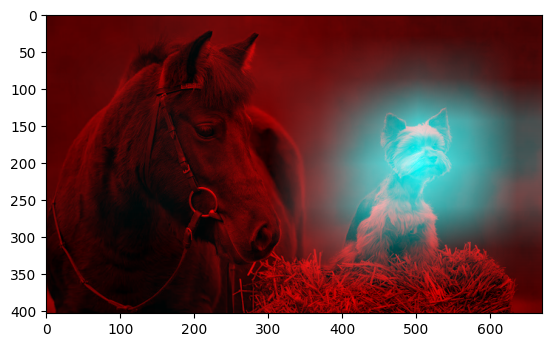

193 Australian terrier


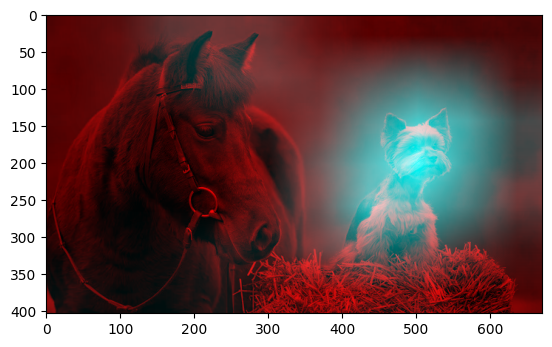

515 cowboy hat, ten-gallon hat


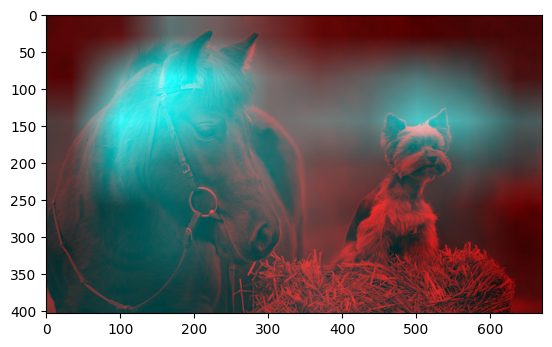

186 Norwich terrier


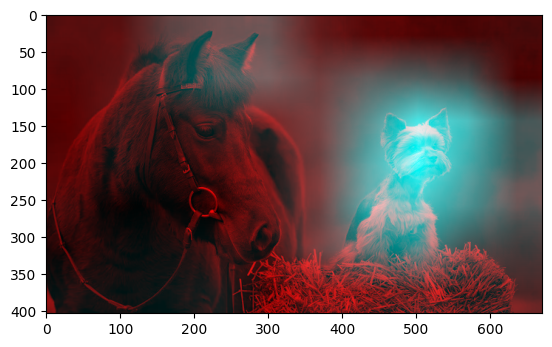

730 plow, plough


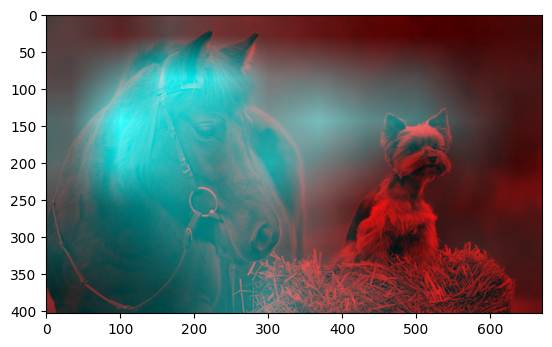

In [ ]:
import seaborn as sns

original = cv2.imread(IMAGE_PATH)
# plt.imshow(original)
# print(original.shape)

for i in idx:
    print(i, clsidx[str(i)])
    plt.figure()
    cam = y[..., i]
    cam /= (cam.max() + 1e-5)
    # cam = cam.transpose()
    # print(cam.shape)
    cam = np.absolute(cam)
    cam = cv2.resize(cam, (671, 404))
    t = original.astype(np.float32) / 255.0
    t[..., 1] = cam
    t[..., 2] = cam
    plt.imshow(t)

    plt.show()

# Pytorch Lightning

https://www.pytorchlightning.ai/

In [ ]:
!pip install -q kaggle

In [ ]:
# How to use the Kaggle API from Colab
# https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [ ]:
!ls -l

total 223544
drwxr-xr-x 3 root root      4096 Feb 13 15:25 flower-photos-classification
-rw-r--r-- 1 root root 228895658 Feb 13 15:25 flower-photos-classification.zip
drwxr-xr-x 1 root root      4096 Feb  9 14:42 sample_data


In [ ]:
!kaggle competitions download -c flower-photos-classification -q
# !mv flower_photos.zip flower-photos-classification.zip
!unzip -fq flower-photos-classification.zip -d flower-photos-classification
!rm -rf flower_photos
!tar -zxf flower-photos-classification/flower_photos.tgz --directory flower-photos-classification

In [ ]:
!ls -l flower-photos-classification/
!ls -l flower-photos-classification/flower_photos/

total 223500
drwxr-x--- 7 270850 5000      4096 Feb 10  2016 flower_photos
-rw-r--r-- 1 root   root 228813984 May  7  2021 flower_photos.tgz
-rw-r--r-- 1 root   root     41780 May  7  2021 sample_submission.csv
total 612
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  53248 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  40960 Feb 10  2016 tulips


In [ ]:
!pip install -q pytorch-lightning
!pip install -q efficientnet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
from IPython.display import FileLink
from copy import deepcopy
import os
from shutil import copyfile
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt

import pytorch_lightning as pl
import torchvision
from efficientnet_pytorch import EfficientNet

In [ ]:
pl.seed_everything(42)

INFO:lightning_fabric.utilities.seed:Global seed set to 42


42

In [ ]:
plt.imread('flower-photos-classification/flower_photos/daisy/105806915_a9c13e2106_n.jpg').shape

(213, 320, 3)

In [ ]:
# [ x for x in test_answers['Id'][:3]]

In [ ]:
!ls -l flower-photos-classification/flower_photos

total 612
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  53248 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  40960 Feb 10  2016 tulips


In [ ]:
!ls -l flower-photos-classification/flower_photos/daisy | head

total 34796
-rw-r----- 1 270850 5000  26797 Jan 11  2016 100080576_f52e8ee070_n.jpg
-rw-r----- 1 270850 5000 117247 Jan 11  2016 10140303196_b88d3d6cec.jpg
-rw-r----- 1 270850 5000  36410 Jan 11  2016 10172379554_b296050f82_n.jpg
-rw-r----- 1 270850 5000 102862 Jan 11  2016 10172567486_2748826a8b.jpg
-rw-r----- 1 270850 5000  27419 Jan 11  2016 10172636503_21bededa75_n.jpg
-rw-r----- 1 270850 5000 132803 Jan 11  2016 102841525_bd6628ae3c.jpg
-rw-r----- 1 270850 5000 102618 Jan 11  2016 1031799732_e7f4008c03.jpg
-rw-r----- 1 270850 5000  51688 Jan 11  2016 10391248763_1d16681106_n.jpg
-rw-r----- 1 270850 5000  13946 Jan 11  2016 10437754174_22ec990b77_m.jpg


In [ ]:
!rm -rf flower-photos-classification/test

In [ ]:
IMAGE_SIZE = [128, 128]

class FlowerDataModlule(pl.LightningDataModule):
    def __init__(self, batch_size=50, valid_ratio=0.05):
        super().__init__()

        self.batch_size = batch_size
        self.valid_ratio = valid_ratio

    def setup(self, stage=None):

        test_transforms = [
            torchvision.transforms.Resize([128, 128]),
            torchvision.transforms.ToTensor(),
        ]

        train_transforms = deepcopy(test_transforms)
        train_transforms.append( torchvision.transforms.RandomAffine( degrees=10, scale=(0.9, 1.1)) )

        test_transforms = torchvision.transforms.Compose(test_transforms)
        train_transforms = torchvision.transforms.Compose(train_transforms)

        all_train_data = torchvision.datasets.ImageFolder(
            'flower-photos-classification/flower_photos/',
            transform=train_transforms,
        )


        valid_len = int(self.valid_ratio * len(all_train_data))
        train_len = len(all_train_data) - valid_len
        train_data, valid_data = torch.utils.data.random_split(all_train_data, (train_len, valid_len))
        self.train = train_data
        self.valid = valid_data


        test_dir = 'flower-photos-classification/test/'
        if not os.path.exists(test_dir):
            # print("generating test dataset")
            os.mkdir(test_dir)
            test_dir_with_label = test_dir + 'fake_label'
            os.mkdir(test_dir_with_label)


            test_answers = pd.read_csv("flower-photos-classification/sample_submission.csv")
            # print("test_answers", test_answers)
            for src in test_answers['Id']:
                fname = os.path.basename(src)
                # print(src, os.path.join(test_dir_with_label, fname))
                copyfile(os.path.join("flower-photos-classification/", src), os.path.join(test_dir_with_label, fname))

        self.test = torchvision.datasets.ImageFolder(test_dir, transform=test_transforms)

    def train_dataloader(self):
        return DataLoader(self.train, shuffle=True, batch_size=self.batch_size)

    def val_dataloader(self):
        return DataLoader(self.valid, shuffle=False, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test, shuffle=False, batch_size=self.batch_size)

In [ ]:
cdm = FlowerDataModlule(batch_size=10)
cdm.setup()
print(cdm.train.dataset.class_to_idx)
class_index_to_label = [
    "DAISY",
    "DANDELION",
    "ROSE",
    "SUNFLOWER",
    "TULIP"
]

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [ ]:
class FlowerClf(pl.LightningModule):
    def __init__(self, labels_cnt=5, lr=3e-4, train_fc_only_steps=100, train_tail_only_steps=2000, train_with_half_blocks_steps=300):

        super().__init__()

        self.labels_cnt = labels_cnt

        self.lr = lr
        self.train_fc_only_steps = train_fc_only_steps
        self.train_tail_only_steps = train_tail_only_steps
        self.train_with_half_blocks_steps = train_with_half_blocks_steps

        self._setup_model()
        self.criterion = nn.CrossEntropyLoss()

        return

    def _setup_model(self):
        self.model = EfficientNet.from_pretrained('efficientnet-b6')
        orig_model_fc = self.model._fc
        self.model._fc = nn.Linear(orig_model_fc.in_features, self.labels_cnt)

    def freeze(self, module):
        for p in module.parameters():
            p.requires_grad = False

    def unfreeze(self, module):
        for p in module.parameters():
            p.requires_grad = True

    def gradual_unfreeze(self):

        if self.trainer.global_step < self.train_fc_only_steps:
            self.freeze(self.model)
            self.unfreeze(self.model._fc)
        elif self.trainer.global_step < self.train_tail_only_steps:
            self.unfreeze(self.model)
            self.freeze(self.model._conv_stem)
            self.freeze(self.model._bn0)
            self.freeze(self.model._blocks)
        elif self.trainer.global_step < self.train_with_half_blocks_steps:
            self.unfreeze(self.model)
            self.freeze(self.model._conv_stem)
            self.freeze(self.model._bn0)
            for mod in self.model._blocks[:22]:
                self.freeze(mod)
        else:
            self.unfreeze(self.model)

        # https://github.com/PyTorchLightning/pytorch-lightning/issues/2733
        # pip install pytorch-lightning==0.9.0rc2
        # self.log("trainable_params", pl.core.memory.ModelSummary(self).trainable_parameters, prog_bar=True)

    def compute_loss(self, batch, track_accuracy=False):

        images, labels = batch
        class_probas = self.model.forward(images)

        loss = self.criterion(class_probas, labels.view(-1))

        if track_accuracy:
            _, predicted_labels = class_probas.max(dim=-1)

            accuracy = (predicted_labels == labels).sum() / labels.numel()
            self.log('accuracy', accuracy.item())

        return loss

    def training_step(self, batch, batch_idx):

        self.gradual_unfreeze()

        loss = self.compute_loss(batch)

        self.log('loss', loss.item())

        return loss

    def validation_step(self, batch, batch_idx):

        loss = self.compute_loss(batch, track_accuracy=True)

        self.log('valid_loss', loss.item())

        return loss

    # def val_epoch_end(self, validation_step_outputs):
        # pass
        #

    def test_step(self, batch, batch_idx):
        images, _ = batch
        class_probas = self.model.forward(images)
        _, predicted_labels = class_probas.max(dim=-1)

        return predicted_labels

    def test_epoch_end(self, train_steps_outs):

        cated_train_steps_outs = torch.cat(train_steps_outs, dim=0)

        predicted_labels = cated_train_steps_outs.cpu().detach().numpy()
        test_answers = pd.read_csv("flower-photos-classification/sample_submission.csv")
        category_prediction = pd.DataFrame({
            "Id": test_answers['Id'],
            "Category": [ class_index_to_label[x] for x in predicted_labels.tolist()]
        })


        csv_file = f'flower-photos-classification/mysubmission_v{self.trainer.logger.version}.csv'
        category_prediction.to_csv(csv_file, index=False)
        self.csv_file_link = FileLink(csv_file)
        print("csv_file_link:", self.csv_file_link)


    def configure_optimizers(self):
        opt = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        lr_schedulers = {'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=10, verbose=True), 'monitor': 'loss'}
        return [opt], lr_schedulers

In [ ]:
%load_ext tensorboard

In [ ]:
!mkdir ./lightning_logs/

In [ ]:
%tensorboard --logdir ./lightning_logs/

In [ ]:
cdm = FlowerDataModlule(batch_size=10)
cplm = FlowerClf(lr=0.00001)

from pytorch_lightning.callbacks import EarlyStopping

early_stop_callback = EarlyStopping(
    monitor='accuracy',
    mode='max',
    min_delta=0.01,
    patience=2,
    verbose=True,
)
trainer = pl.Trainer(gpus=1, callbacks=[early_stop_callback], max_epochs=3, track_grad_norm=2)

trainer.fit(cplm, cdm)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b6-c76e70fd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b6-c76e70fd.pth


  0%|          | 0.00/165M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:466: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Loaded pretrained weights for efficientnet-b6


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | EfficientNet     | 40.7 M
1 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
40.7 M    Trainable params
0         Non-trainable params
40.7 M    Total params
162.989   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric accuracy improved. New best score: 0.301


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric accuracy improved by 0.169 >= min_delta = 0.01. New best score: 0.470


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric accuracy improved by 0.022 >= min_delta = 0.01. New best score: 0.492
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
# наследуемся от предыдущей модели
class FlowerClfResNet(FlowerClf):
    def __init__(self, **kwargs):

        super().__init__(**kwargs)

    def _setup_model(self):
        self.model = torchvision.models.resnet50(pretrained=True)
        orig_model_fc = self.model.fc
        self.model.fc = nn.Linear(orig_model_fc.in_features, self.labels_cnt)

    def gradual_unfreeze(self):

        if self.trainer.global_step < self.train_fc_only_steps:
            self.freeze(self.model)
            self.unfreeze(self.model.fc)
        else:
            self.unfreeze(self.model)



In [ ]:
from pytorch_lightning import loggers as pl_loggers

tb_logger = pl_loggers.TensorBoardLogger("./lightning_logs/", version="resnet")

In [ ]:
flower_clf_resnet = FlowerClfResNet(lr=0.0001)

trainer = pl.Trainer(gpus=1, callbacks=[early_stop_callback], max_epochs=3, logger=tb_logger)
trainer.fit(flower_clf_resnet, cdm)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:466: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ResNet           | 23.5 M
1 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
23.5 M    Trainable params

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric accuracy improved by 0.361 >= min_delta = 0.01. New best score: 0.852


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric accuracy improved by 0.033 >= min_delta = 0.01. New best score: 0.885


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


### find_lr

Плохо работает, если сетка заморожена, но пользоваться можно как-то так:

In [ ]:
trainer = pl.Trainer(auto_lr_find=True)

trainer.tune(flower_clf_resnet, cdm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.tuner.lr_finder:LR finder stopped early after 88 steps due to diverging loss.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 2.7542287033381663e-05
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_553bfc39-6c31-4e85-bcbd-97920412b6b3.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_553bfc39-6c31-4e85-bcbd-97920412b6b3.ckpt


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7f15ee954b20>}

## Логирование нормы градиентов



In [ ]:
# track_grad_norm=2
# trainer = pl.Trainer(gpus=1, callbacks=[early_stop_callback], max_epochs=3, track_grad_norm=2)

# Самодельное логирование нормы градиентов

## Хуки

[register_forward_hook](https://pytorch.org/docs/stable/generated/torch.nn.modules.module.register_module_forward_hook.html)

Registers a global forward hook for all the modules

In [ ]:
# source https://blog.paperspace.com/pytorch-hooks-gradient-clipping-debugging/

class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5,5)
        self.activation = nn.ReLU()

    def forward(self, x):
        return self.activation(self.fc1(x))

    # def _forward_hook(self, module, input, output):
    #     pass

    # def _backward_hook(self, module, grad_input, grad_output):
    #     pass

net = myNet()

def forward_hook_fn(module, input, output):
    print("forward", module, input[0].shape, output[0].shape)

def backward_hook_fn(module, input_grad, output_grad):
    print("backward", module, input_grad[0].shape, output_grad[0].shape)

for name, layer in net._modules.items():
    layer.register_forward_hook(forward_hook_fn)
    layer.register_backward_hook(backward_hook_fn)

In [ ]:
out = net(torch.randn(1,5))

forward Linear(in_features=5, out_features=5, bias=True) torch.Size([1, 5]) torch.Size([5])
forward ReLU() torch.Size([1, 5]) torch.Size([5])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [ ]:
out.mean().backward()

backward ReLU() torch.Size([1, 5]) torch.Size([1, 5])
backward Linear(in_features=5, out_features=5, bias=True) torch.Size([5]) torch.Size([1, 5])


In [ ]:
from torch.utils.tensorboard import SummaryWriter

tboard_log_dir='./tboard_logs/exp2'

log_writer = SummaryWriter(log_dir=tboard_log_dir)

for i in range(1000):
    log_writer.add_scalar('train/loss', (1000 - i) / 10000, global_step=i)

    log_writer.add_scalar('val/loss', (1000 - i) / 10000, global_step=i)
    log_writer.add_scalar('val/accuracy', i/1000, global_step=i)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./tboard_logs

In [ ]:
net = myNet()

global_step = 0

def log_grad_norm_hook_fn(module, grad_input, grad_output):
    # print("backward", module, grad_input[0].shape, grad_output[0].shape)

    grad_norm = grad_output[0].norm(2).item()
    log_writer.add_scalar('train/grad_norm_' + str(module.__class__), grad_norm, global_step=global_step)

for name, layer in net._modules.items():
    layer.register_backward_hook(log_grad_norm_hook_fn)

In [ ]:
for i in range(100):
    global_step += 1

    # zero grad?
    out = net(torch.randn(1,5))
    loss = out.mean() * i
    loss.backward()

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


# Выбор оптимального LR


Для выбора оптимального LR удобно использовать т.н. Learning Rate Range Test, часто процедуру называют просто find_lr. Под капотом проход по тренировочной эпохе с lr, изменяемым на каждом батче по формуле:

$$
\mathrm{it} = \frac{\mathrm{step}}{\mathrm{total steps}}\\
\mathrm{lr} = \exp\left\{
    (1 - t ) \log a + t \log b
\right\}
$$

Чтобы поменять LR для всех оптимизируемых параметров, можно пройтись по ним циклом:

```
for param_group in optimizer.param_groups:
    param_group['lr'] = lr
```


<img src="https://www.jeremyjordan.me/content/images/2018/02/lr_finder.png"/>

_картинка из бложика [Jeremy Jordan](https://www.jeremyjordan.me/nn-learning-rate/)_


Идея приема простая: пока LR меньше некоторого порога на каждом шаге градиентного спуска веса просто не меняются (в частности из-за особенностей операций с плавающей точкой).
При очень большом LR мы шагаем слишком далеко и уходим от точки экстремума.

Оптимальный LR лежит где-то между ними. Экспоненциальная формула изменения LR позволяет с должным качеством найти хорошую точку.



Если интересно: [статья , в которой эту технику предложили и активно использовали](https://arxiv.org/pdf/1506.01186.pdf).


**Some math notes**

У типов данных с плавающей точкой есть арифметические особенности:

**fp32**
$$
x + \delta == x,\,\mathrm{если}\; \delta < 5.96 \cdot 10^{-8} x
$$

К слову, это еще одна причина присматривать за величинами активаций, нормировать данные и таргет в случае регрессии. Можно было бы перейти на float64, но (вычислительно и по памяти) дешевле быть аккуратными на float32.



<img src="https://blogs.nvidia.com/wp-content/uploads/2020/05/tf32-Mantissa-chart-hi-res-FINAL-400x255.png.webp"/>

_картинка из статьи [NVIDIA](https://blogs.nvidia.com/blog/2020/05/14/tensorfloat-32-precision-format/)

## [отступление] Задача на сложение чисел с плавующей точкой

Есть массив чисел с плавующей точкой. Нужно найти сумму этих чисел.


In [ ]:
import numpy as np

float_array = np.exp(np.linspace(-15, 10, 100)).astype(np.float32)
float_array[:3], float_array[-3:]

In [ ]:
print("{:.8f} {:.8f}".format(float_array[0], float_array[-1]))

assert float_array[0] + float_array[-1] == float_array[-1]

In [ ]:
float_array[0] + float_array[1], float_array[0]

In [ ]:

from tqdm.auto import tqdm
import bisect

float_array = np.array([1e-10] * 10000 + [ 10 ] * 100 , dtype=np.float32)

# складываем от большего к меньшему
sum = 0
for elem in reversed(float_array):
    sum += elem

print("sum", sum)


# складываем от меньшего к большему
sum_sorted = 0
for elem in float_array:
    sum_sorted += elem

print("sum_sorted", sum_sorted)


# поддерживаем сортированость массива
# sum_keep_sorted = 0
# sorted_floats = float_array.tolist()
# for _ in tqdm(range(len(sorted_floats) - 1)):
#     sorted_floats = sorted(sorted_floats)
#
#     sum_least_elements = sorted_floats.pop(0) + sorted_floats.pop(0)
#     sorted_floats.insert(0, sum_least_elements)


# поддерживаем сортированость массива, оптимальный вариант
sum_keep_sorted_optim = 0
sorted_floats_optim = float_array.tolist()
for _ in tqdm(range(len(sorted_floats_optim) - 1)):
    # более оптимальный вариант
    sum_least_elements = sorted_floats_optim.pop(0) + sorted_floats_optim.pop(0)
    bisect.insort_left(sorted_floats_optim, sum_least_elements)
    if len(sorted_floats_optim) == 1:
        sum_keep_sorted_optim = sorted_floats_optim[0]

print("sum_keep_sorted_optim", sorted_floats_optim[0])

# для того, чтобы заметить разницу между sum_keep_sorted и sum_sorted надо 5.96 e8 элементов в массиве -- это массив, который будет весить порядка гигабайта и даже для более оптимального  варианта может долго вычисляться

# Pytorch Internals

* http://blog.ezyang.com/2019/05/pytorch-internals/
* https://pytorch.org/blog/a-tour-of-pytorch-internals-1/

# Блиц

### Почему происходит затухание градиентов?


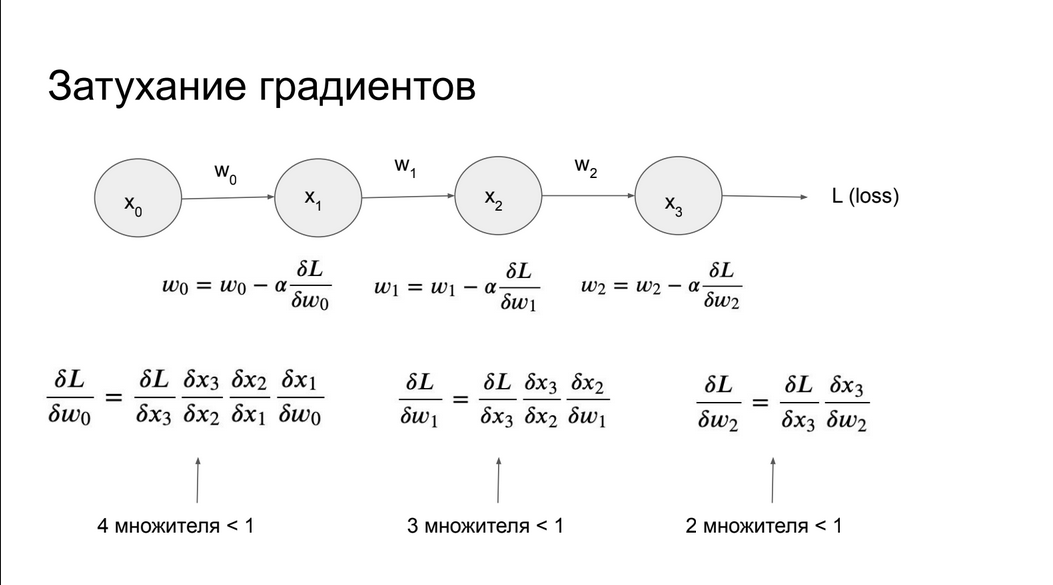

Слайд из лекции Тани Гайнцевой dlschool



### Какие есть методы борьбы с затуханием градиентов?

* residual block
* трейнить несколько классификаторов на разных уровнях сети (это старый подход, не актуально в наше время)


## Зачем нужен параметр `groups=?` в `nn.Conv2d`?

Позволяет уменьшить количество параметров в модели, с помощью него можно регулировать количество обучаемых ядер. Но за счет уменьшения, что не все out_channels теперь имеют информацию только о некоторых in_channels.

Если `groups=1`, то это обычная свертка, где все in_channels сворачиваются во все `out_channels`

Если `groups=in_channels=out_channels=N`, то такая свертка эквивалентна применению `N` сверток независимо


## Что делать, если во время обучения нейросети начали взрываться градиенты, появились бесконечности в весах модельки?

<!--
Дебажить) Можно залогировать нормы градиентов для каждого слоя сети.

Можно поставить forward/backward хуки, проверять в них, на каком именно слое начали появляться плохие значения или градиенты
-->


------


## Вопросы по домашкам?

## Новая домашка

# hw-letters

Из фидбэка по домашке в прошлом году, эта домашка была очень сложная и очень много времени заняла (35-72 часа), но тем людям, которые оставили фидбэк она понравилась.

К решению задачи надо подойти творчески.

Сложность домашки заключается в следующем:
* достаточно большой объем данных, который надо грамотно предобработать


PS Если у вас нет столько времени на домашку, можете ее не делать. Без этой домашки можно набрать 16/20 ~ 8 баллов, если вовремя сделать все остальные домашки




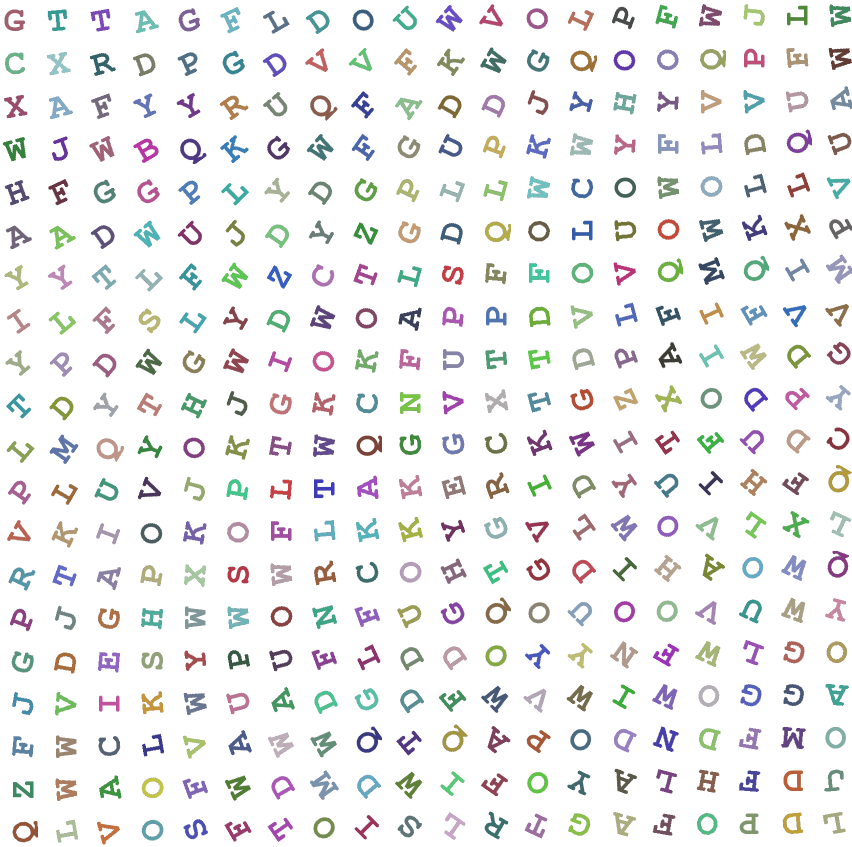